# Block 44: Workshop
## __Text Classification using RNN__

### Scenario 

Imagine you are working for a news aggregator platform that collects articles from various sources. To improve the user experience, the platform wants to automatically categorize these articles into relevant topics. This categorization will help users discover articles of interest more efficiently. 

### Objective 

Your task is to develop a text classification model using Recurrent Neural Networks (RNNs) to classify these articles into predefined topics or categories. The platform has provided you with a dataset containing text articles and their corresponding labels. Your model should be able to analyze the content of these articles and assign them to the most appropriate category. 


In [1]:
#!pip install nltk
#import nltk
#nltk.download('stopwords')

### Step 1: Importing the libraries
- Import the required libraries

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt

2024-10-31 19:34:02.831865: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 19:34:02.870456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-10-31 19:34:05.061761: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Step 2: Defining the Hyperparameter
- Set the value of __vocab_size__ to __5000__, representing the size of the vocabulary
- Set the value of __embedding_dim__ to __64__, specifying the dimensionality of the word embeddings
- Set the value of __max_length__ to __200__, indicating the maximum length of input sequences
- Set the value of __padding_type__ to __post__, specifying that padding should be added at the end of sequences
- Set the value of __trunc_type__ to __post__, indicating that truncation should be applied at the end of sequences
- Set the value of __oov_tok__ to __OOV__, representing the token to be used for out-of-vocabulary words
- Set the value of __training_portion__ to __0.8__, representing the proportion of data to be used for training

In [ ]:
vocab_size = 5000 # representing the size of the vocabulary
embedding_dim = 64 # dimensionality of the word embeddings
max_length = 200 #indicating the maximum length of input sequences
padding_type = 'post' # specifying that padding should be added at the end of sequences
trunc_type = 'post' #indicating that truncation should be applied at the end of sequences
oov_tok = 'OOV' #representing the token to be used for out-of-vocabulary words
training_portion = 0.8 # the proportion of data to be used for training

In [4]:
STOPWORDS
stopwords = ''
for word in STOPWORDS:
    stopwords +=(f'{word}|')

    
#removing the last '|' symbol from stopwords
stopwords = stopwords[:len(stopwords)-1]
print(stopwords)

shouldn|were|by|such|but|ourselves|than|don|whom|nor|any|didn|down|won't|yours|these|does|on|off|hasn|then|weren't|who|too|you'd|under|ve|was|where|because|all|ours|yourself|other|in|until|why|isn|mightn|here|just|is|further|aren|to|be|for|so|am|at|only|re|after|y|hadn|me|themselves|and|into|haven|if|them|you'll|more|myself|do|hers|m|wasn|i|will|mightn't|wouldn't|below|now|same|you've|mustn't|ll|himself|haven't|that'll|isn't|no|that|he|aren't|him|couldn't|needn|it's|your|she|a|as|should|ain|my|with|s|not|herself|through|this|or|over|out|we|you|very|before|doesn|shan|during|are|itself|there|an|you're|once|our|again|did|both|weren|her|mustn|those|some|being|it|which|above|doesn't|yourselves|had|each|can|its|been|hadn't|hasn't|how|needn't|didn't|have|about|his|between|theirs|d|couldn|doing|o|what|against|of|wasn't|shan't|she's|ma|should've|from|up|won|few|having|they|shouldn't|own|most|their|wouldn|the|t|has|while|don't|when


In [5]:
#converting the extra (')s to strings
stopwords = 'ourselves|there|d|very|each|down|how|we|hers|will|it\'s|re|haven\'t|y|they|didn\'t|you|at|themselves|shan|should|shouldn\'t|am|should\'ve|him|s|won\'t|their|while|so|to|why|were|and|is|i|does|until|been|out|up|wouldn\'t|all|can|mightn|it|mustn\'t|theirs|no|haven|under|both|be|that\'ll|that|against|which|having|now|her|an|ll|after|ours|have|t|from|during|them|other|itself|yourself|had|nor|in|here|few|if|wasn|most|my|couldn|you\'re|only|couldn\'t|on|about|because|a|you\'d|yourselves|of|ain|being|before|who|some|but|isn\'t|over|wouldn|you\'ll|weren\'t|she|this|such|ma|not|wasn\'t|myself|yours|did|too|what|when|weren|his|whom|those|didn|won|by|than|o|doesn\'t|hadn\'t|or|own|its|any|has|with|shan\'t|through|he|just|mustn|more|same|ve|the|aren|above|these|don|as|she\'s|again|our|doing|himself|hasn\'t|once|isn|you\'ve|aren\'t|hasn|where|do|then|your|are|was|below|don\'t|me|m|shouldn|between|needn|hadn|needn\'t|into|herself|for|off|doesn|mightn\'t|further'

### Step 3: Preprocessing the Data and Printing the Lengths of the Labels and Articles Lists.

- Define two empty lists, articles, and labels to store the articles and labels, respectively
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row
- Extract the label from the first column of each row and append it to the labels list
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space and then append it to the articles list
- Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively

In [ ]:
import re

articles = []
labels = []

# Create a regular expression pattern using the stopwords
stopwords_pattern = r'\b(?:ourselves|there|d|very|each|down|how|we|hers|will|it\'s|re|haven\'t|y|they|didn\'t|you|at|themselves|shan|should|shouldn\'t|am|should\'ve|him|s|won\'t|their|while|so|to|why|were|and|is|i|does|until|been|out|up|wouldn\'t|all|can|mightn|it|mustn\'t|theirs|no|haven|under|both|be|that\'ll|that|against|which|having|now|her|an|ll|after|ours|have|t|from|during|them|other|itself|yourself|had|nor|in|here|few|if|wasn|most|my|couldn|you\'re|only|couldn\'t|on|about|because|a|you\'d|yourselves|of|ain|being|before|who|some|but|isn\'t|over|wouldn|you\'ll|weren\'t|she|this|such|ma|not|wasn\'t|myself|yours|did|too|what|when|weren|his|whom|those|didn|won|by|than|o|doesn\'t|hadn\'t|or|own|its|any|has|with|shan\'t|through|he|just|mustn|more|same|ve|the|aren|above|these|don|as|she\'s|again|our|doing|himself|hasn\'t|once|isn|you\'ve|aren\'t|hasn|where|do|then|your|are|was|below|don\'t|me|m|shouldn|between|needn|hadn|needn\'t|into|herself|for|off|doesn|mightn\'t|further)\b'
lonely_period_pattern = r'\s+\.\s+'

with open('bbc-text.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        labels.append(row[0])
        article = row[1]

        # Substitute occurrences of stopwords with an empty string
        cleaned_article = re.sub(stopwords_pattern, '', article)
        
        # Substitute occurrences of misplaced periods with proper spacing
        cleaned_article = re.sub(lonely_period_pattern, '. ', cleaned_article)
        
        # Remove extra spaces created by the substitutions
        cleaned_article = re.sub(r'\s+', ' ', cleaned_article).strip()
    
        articles.append(cleaned_article)

# Optionally remove headers if they exist
articles = articles[1:]
labels = labels[1:]

# Example output to check cleaning
print(articles[5])
print(len(articles[5]))
print(len(labels), len(articles))

howard hits back mongrel jibe michael howard said claim peter hain tory leader acting like attack mongrel shows labour rattled opposition. upbeat speech party spring conference brighton said labour campaigning tactics proved tories hitting home. mr hain made claim tory tactics anti-terror bill debate. something tells someone somewhere little bit rattled mr howard said. mr hain leader commons told bbc radio four today programme mr howard stance government anti-terrorism legislation putting country risk. accused tory leader behaving like attack mongrel playing opposition opposition sake. mr howard told party labour would anything say anything claim anything cling office costs. far year compared fagin shylock flying pig. morning peter hain even called mongrel. know something tells someone somewhere little bit rattled. environment secretary margaret beckett rejected mr howard comment telling radio 4 pm programme labour rattled. real duty try get people focus michael howard record proposals

### Step 4: Splitting the Data into Training and Validation Sets
- Calculate the **train_size** by multiplying the length of the articles list with __training_portion__ and converting it to an integer.
- Create **train_articles** by slicing the articles list from index **0** to **train_size**.
- Create **train_labels** by slicing the labels list from index** 0 **to **train_size**.
- Create **validation_articles** by slicing the articles list from **train_size** onward.
- Create **validation_labels** by slicing the labels list from **train_size** onward.
- Print the **train_size** to display the calculated value.

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [ ]:
train_size = int(training_portion * (len(articles)))

train_articles = articles[:train_size]
train_labels = labels[:train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles), len(train_labels), len(validation_articles), len(validation_labels))

1780
1780 1780 445 445


### Step 5: Initializing a Tokenizer and Fitting It on the Training Articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token.
- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method.
- This step updates the tokenizer's internal word index based on the words in the training articles.
- Assign the word index obtained from the tokenizer to the variable **word_index**.
- Extract the first 10 items from the **word_index** dictionary.
- Print the resulting dictionary.

In [ ]:
from itertools import islice

tokenizer = Tokenizer(num_words = vocab_size,
                     oov_token=oov_tok)

tokenizer.fit_on_texts(train_articles)

word_index = tokenizer.word_index


def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

n_itemword_indexs = take(10, word_index.items())
print(n_itemword_indexs)

[('OOV', 1), ('said', 2), ('mr', 3), ('would', 4), ('year', 5), ('also', 6), ('people', 7), ('new', 8), ('us', 9), ('one', 10)]


### Step 6: Converting the Training Articles into Sequences Using the Tokenizer
- Convert the training articles **(train_articles)** into sequences using the **texts_to_sequences** method of the tokenizer object and assign the result to **train_sequences**
- Print the sequence representation of the 11th training article (index 10) by accessing **train_sequences[10]**

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
#train_sequences[10]


train_padded = pad_sequences(sequences=train_sequences, 
                             maxlen=max_length,
                             padding=padding_type,
                             truncating=trunc_type)


train_padded[10]
print(len(train_sequences), len(train_padded))

1780 1780


### Step 7: Padding the Sequence
- Pad the sequences in **train_sequences** using the **pad_sequences** function
- Set the maximum length of the padded sequences to **max_length**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type**
- Assign the padded sequences to the variable **train_padded**

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
#validation_sequences[10]


validation_padded = pad_sequences(sequences=validation_sequences, 
                             maxlen=max_length,
                             padding=padding_type,
                             truncating=trunc_type)
#validation_padded[10]


print(len(validation_sequences), len(validation_padded))

445 445


### Step 8: Printing the Length of Validation Sequences and the Shape of Validation Padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded**
- Print the length of **validation_sequences** and the shape of **validation_padded**
- Create a tokenizer for the labels and fit it on the labels list
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays

In [ ]:
#LABEL TOKENIZER

#creating label tokenizer
tokenizer_label = Tokenizer(num_words = vocab_size)

#fitting label tokenizer
tokenizer_label.fit_on_texts(train_labels)

#assigning label index and printing the itemlabel index
label_index = tokenizer_label.word_index
n_itemlabel_indexs = take(10, label_index.items())
print(n_itemlabel_indexs)


training_label_seq = tokenizer_label.texts_to_sequences(train_labels)
training_label_seq = np.array(training_label_seq)
#print(training_label_seq[10])


validation_label_seq = tokenizer_label.texts_to_sequences(validation_labels)
validation_label_seq = np.array(validation_label_seq)
#print(validation_label_seq[10])

#double checking len of label_seqs
print(len(training_label_seq), len(validation_label_seq))
#double checking type of label_seqs
print(type(training_label_seq), type(validation_label_seq))

[('sport', 1), ('business', 2), ('politics', 3), ('entertainment', 4), ('tech', 5)]
1780 445
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### Step 9: Training the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim)**
- Add a bidirectional LSTM layer to the model with the same embedding dimension
- Add a dense layer to the model with the embedding dimension as the number of units and **relu** activation function
- Add a dense layer with 6 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [ ]:
model =  tf.keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    layers.Bidirectional(layers.LSTM(units=embedding_dim)),
    layers.Dense(units=embedding_dim, activation='relu'),
    layers.Dense(units=6, activation='softmax')
])

### Step 10: Compiling the Model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy**
- Set the number of epochs to 10
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq)**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

num_epochs = 10
model_history = model.fit(x=train_padded, 
                          y=training_label_seq, 
                          epochs = num_epochs, 
                          validation_data=(validation_padded, validation_label_seq), 
                          verbose = 2)

Epoch 1/10
56/56 - 11s - loss: 1.5361 - accuracy: 0.3112 - val_loss: 1.1557 - val_accuracy: 0.5528 - 11s/epoch - 202ms/step
Epoch 2/10
56/56 - 9s - loss: 0.9541 - accuracy: 0.6270 - val_loss: 0.8530 - val_accuracy: 0.7596 - 9s/epoch - 152ms/step
Epoch 3/10
56/56 - 9s - loss: 0.4168 - accuracy: 0.8803 - val_loss: 0.3057 - val_accuracy: 0.9326 - 9s/epoch - 153ms/step
Epoch 4/10
56/56 - 9s - loss: 0.1309 - accuracy: 0.9596 - val_loss: 0.2944 - val_accuracy: 0.9213 - 9s/epoch - 152ms/step
Epoch 5/10
56/56 - 8s - loss: 0.0608 - accuracy: 0.9831 - val_loss: 0.1954 - val_accuracy: 0.9416 - 8s/epoch - 152ms/step
Epoch 6/10
56/56 - 9s - loss: 0.0196 - accuracy: 0.9955 - val_loss: 0.2039 - val_accuracy: 0.9371 - 9s/epoch - 152ms/step
Epoch 7/10
56/56 - 9s - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.4097 - val_accuracy: 0.8787 - 9s/epoch - 153ms/step
Epoch 8/10
56/56 - 9s - loss: 0.0988 - accuracy: 0.9736 - val_loss: 0.2104 - val_accuracy: 0.9461 - 9s/epoch - 152ms/step
Epoch 9/10
56/56 - 9s 

### Step 11: Plotting the Graph
- Define a function named **plot_graphs** that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot()**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string)
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs

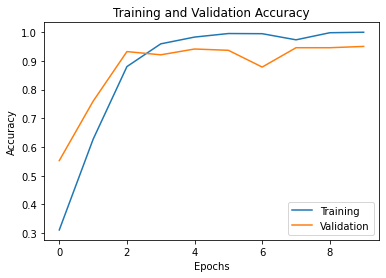

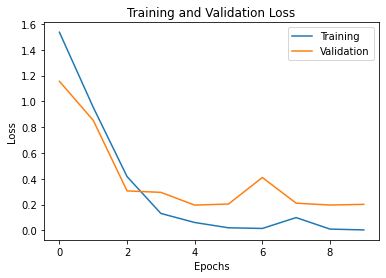

In [ ]:
def plot_graphs(history, metric):
    # Plot the metric values for training and validation
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(['Training', 'Validation'])
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.show()

# Plot accuracy
plot_graphs(model_history, 'accuracy')

# Plot loss
plot_graphs(model_history, 'loss')

14/14 [==============================] - 0s 35ms/step
True Labels:  [4 5 3 1 1 5 2 5 4 4 3 3 2 4 1 4 4 2 1 3 5 2 1 4 5 3 3 1 1 2 2 2 2 2 4 2 3
 3 5 5 4 3 4 2 3 1 1 2 5 2 5 1 2 2 3 1 1 3 3 4 4 3 2 3 3 2 5 3 3 3 3 3 4 4
 5 3 1 3 1 5 1 1 1 4 5 4 5 1 5 1 1 4 4 2 4 4 3 2 1 5 5 3 2 1 2 4 1 3 4 1 1
 2 3 5 5 2 2 1 3 4 1 1 3 4 5 1 4 2 3 1 3 5 4 1 3 2 4 3 4 3 1 3 2 2 3 2 5 1
 2 4 2 1 1 4 5 3 5 3 3 1 1 1 2 5 4 2 1 2 1 2 5 2 2 2 2 1 1 1 2 2 4 2 2 2 1
 1 1 5 2 1 1 1 2 4 5 5 5 3 2 2 5 2 5 1 1 3 3 3 1 1 3 3 5 2 1 1 1 1 2 1 2 2
 2 2 1 3 1 5 5 1 5 2 4 2 1 2 5 5 3 4 2 4 2 5 3 4 3 4 4 5 2 5 5 2 3 1 4 2 3
 4 2 5 1 5 3 1 3 2 3 3 2 2 2 5 3 2 3 2 4 3 1 3 3 1 4 5 5 2 5 1 2 2 3 1 5 5
 5 1 4 1 3 2 3 3 4 5 2 5 1 4 4 1 2 4 5 5 1 4 2 3 3 3 5 5 2 3 2 3 3 4 1 5 2
 5 4 5 5 1 3 1 1 3 4 4 2 3 3 1 2 2 5 2 5 5 1 2 3 1 2 2 1 5 1 5 4 1 1 4 2 5
 1 1 3 5 2 3 1 1 3 4 5 5 5 2 1 4 4 5 2 3 5 1 1 5 5 3 2 1 4 4 1 4 5 5 2 2 2
 1 1 5 1 2 5 2 2 1 2 3 2 2 5 2 5 3 5 4 3 5 4 1 3 4 2 5 2 5 4 5 1 2 2 3 4 3
 1] 
Predicted Labels: [4 5 3 1 

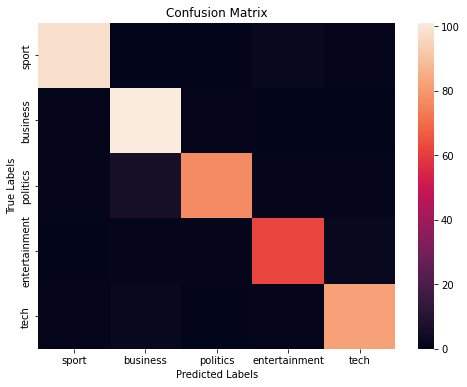

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_single_confusion_matrix(y_true, y_pred, class_names):
    """
    Plot a single confusion matrix for the given true and predicted labels.

    Args:
    y_true: List or array of true labels.
    y_pred: List or array of predicted labels.
    class_names: List of class names for the labels.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=range(1, len(class_names) + 1))
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=False, robust=True, cmap='rocket', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


    

y_true = np.ravel(validation_label_seq)
predictions = model.predict(validation_padded)
y_pred =  np.argmax(predictions, axis=1)

print('True Labels: ', y_true, '\nPredicted Labels:',y_pred)

# Class names based on your previous input
class_names = ['sport', 'business', 'politics', 'entertainment', 'tech']

# Call the function to plot the confusion matrix
plot_single_confusion_matrix(y_true, y_pred, class_names)

# Final Model is able to accuratley classify text based on the words included with in the text.